iVBORw0KGgoAAAANSUhEUgAAA0wAAAM8CAIAAADr3bchAAEAAElEQVR4nOz92ZbsSJIdCm5RVQBm5u7nnBgyI5NDZS0u8r6wm1x9X7n4H/3SP9Bfevv2G9lcvZq3WCTrVmVFxnyOD2YGQFX6QXQQhQJ2PDKyqjIjIQ/mcAwKnaGydYsI/T//H/93JCGi/KvPgOUMAyAj9wAAMwMwxuRfOSO/1loA7IMkxRxQS7yZNl7NWJyR+4lMPh8kBcmYSiGEkG6m/KCI5FPfLBmz1ujH8/3OuXymftbk39l7yW7gAMB7L9ktVRfziVyBoamNtgLlRYYMAA4MgHSjxPTSberxdMaqm8s9pCq8bRSdZp2akcfralzmHPllqdLkrO4qcl6SlboyqpWh7iciyWFKXLcpVCKldXT+2xLpdkTVB3j1qa1cLUrxGmmHVf6/rZbcuPr5NkmkepC21plMx6X2yFi5X7+CwPnV+kGdmRDKuEtJLTubFpVMlSbqqpNLXo21eEa15jzPSDOJjEQ5L92m67qcJjWtiXogV5OS6o1+GslP5Do2Tu6M3YMDTZeDc7AuuAHGyLN6/plnL29pXyQ3yCPGGAQf5hFE5L0JE4MIbPoDjJPXWWvhuv5wys9K6VJBYncHYr8Jweuat87lvDnrSoWgzDZSKSFWsgfg/Zwz3LamVHien6dpUvkJAOSMtNc4jgDGccrnX85nAMMwAPDznJ/ygfOvZFgyM/syeeYeEud2Y/Ml6erSbdJty0lbRO5vp/TYt03pCXEorbWgPtZndM/cGgj6jB7jRbgdfXoMeqyNyvg6AKmTdJ0D0Pcd6mkQXJpJfs/nFzn4zW9+A+Df/V/+HYDT6QTg7nAEMAwHpI9v3w/In1cZ8qos8T8qmU61pGtAZSafVMezfCtjZfDit54G5XXNxBgvbg7/th0ZTWdIOcj5bzuP3CPtPl2lMi8Afvjw4fv37wH89X//HwCenp/zbfIrr75erzmp2OFnj/Rl

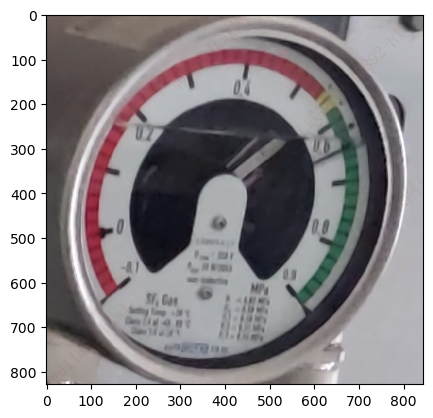

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import base64

# read a labeled segmentation sample from a json file
seg = open('meter3.json').read()
#print(seg)
# convert from string to json object
seg = json.loads(seg)
# show the image string
print(seg['imageData'])
# get image size from segmentation object
im_size = (seg['imageHeight'], seg['imageWidth'])
print(im_size)
# decode from base64 string into image
im_data = base64.b64decode(seg['imageData'])
im = np.frombuffer(im_data, dtype=np.uint8) # create numpy array from base64 string
im = cv2.imdecode(im,cv2.IMREAD_UNCHANGED) # decode image into numpy array
# convert image from RGB into BGR format
im = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
print(im.shape)
# show the image on screen
plt.imshow(im) 
plt.show()


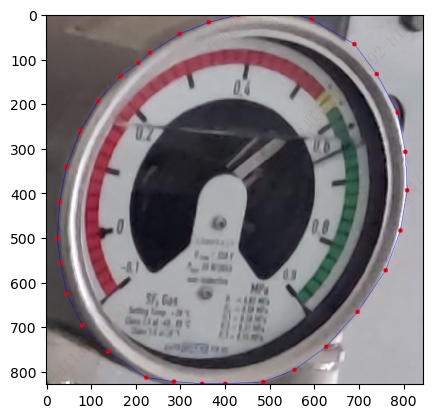

True

In [12]:
# draw the segmentation keypoints from json
first_kpt = None
last_kpt = None
pts = []
vis = im.copy()
for keypoint in seg['shapes'][0]['points']: 
    x, y = int(keypoint[0]), int(keypoint[1])
    pts.append((x,y))
    cv2.circle(vis, (x,y), 5, (255,0,0), -1)
    # line up these keypoints
    if first_kpt == None: 
        first_kpt = (x,y)
    if last_kpt is not None:
        cv2.line(vis, (x,y), last_kpt, (0,0,255), 1)
    last_kpt = (x,y)

# close up the head and tail keypoints
cv2.line(vis, last_kpt, first_kpt, (0,0,255), 1)
# show the image on screen
plt.imshow(vis)
plt.show()
# convert image from RGB to BGR
vis = cv2.cvtColor(vis,cv2.COLOR_BGR2RGB)
# save the image to a file
cv2.imwrite('segmentation_keypoints.jpg', vis)


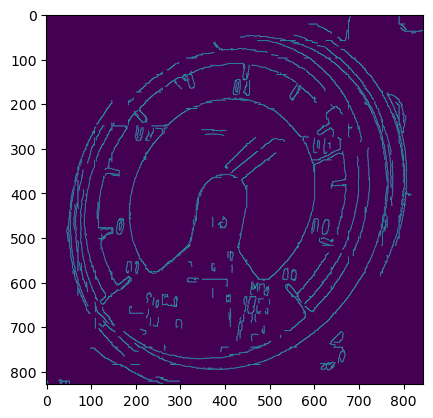

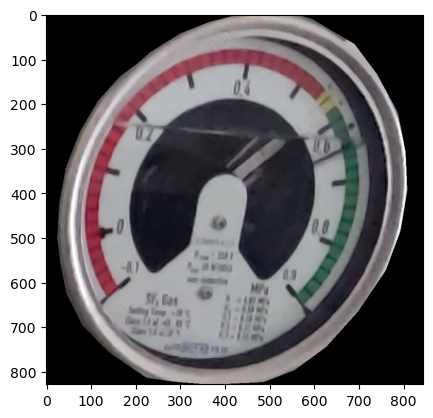

In [13]:
# check the format of contour in opencv
edge_ = cv2.Canny(im, 50, 150, L2gradient=True)
plt.imshow(edge_)
plt.show()
1
contours, _ = cv2.findContours(edge_, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw mask from contours
mask = np.zeros([im.shape[0],im.shape[1]], dtype=np.uint8) # create a black image to draw on
pts_arr = np.array(pts, dtype=np.int32) # convert the points to integer values to draw on the image
pts_arr = [pts_arr.reshape((pts_arr.shape[0],1,2))] # reshape to a line as OpenCv requires it to be a 2D array

cv2.drawContours(mask, pts_arr, 0, 255, -1) # fill the shape with 255 (solid)
masked_im = cv2.bitwise_and(im, im, mask=mask) # apply the mask to the image
plt.imshow(masked_im)
plt.show()

((418.3602294921875, 417.9053955078125), (745.6862182617188, 878.1906127929688), 33.275142669677734)


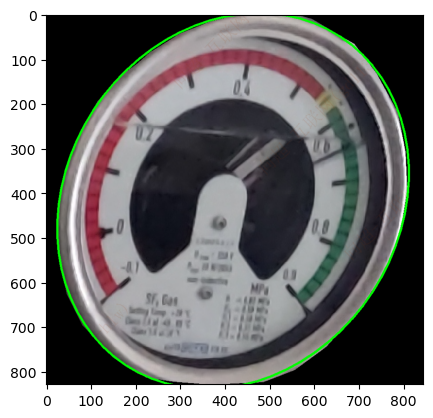

[[ 0.83604547  0.54866016]
 [-0.54866016  0.83604547]]
[[ 347.56053643 -153.76240627]
 [ 970.98812274  255.3659119 ]
 [ 489.15992256  989.57319728]
 [-134.26766376  580.44487911]]


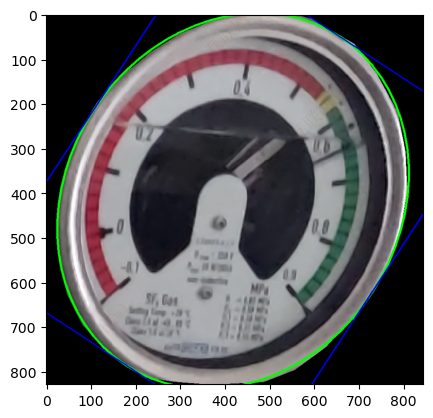

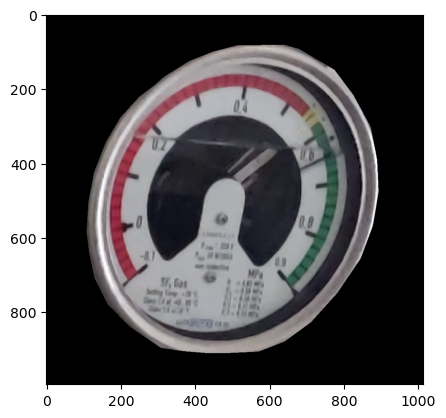

[[   0.83604547    0.54866016 -192.46259903]
 [  -0.54866016    0.83604547  357.75075047]]


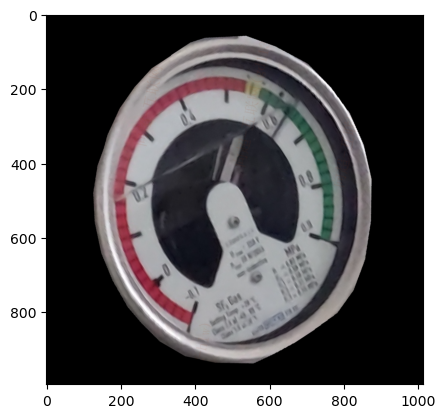

[[  1.1776946   0.        -89.91345  ]
 [  0.          1.          0.       ]]


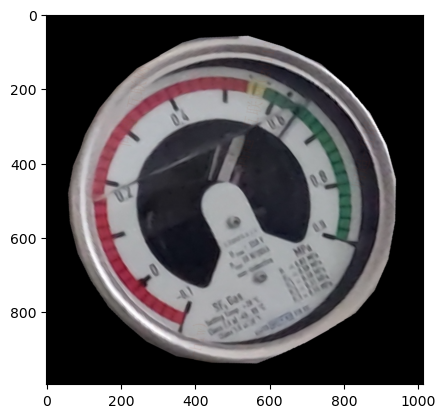

In [14]:
vis = masked_im.copy() # create a copy of the image to draw on
# get the fitting ellipse
ellipse = cv2.fitEllipse(pts_arr[0])
print(ellipse)
cv2.ellipse(vis, ellipse, (0,255,0), 3)
plt.imshow(vis)
plt.show()
# get the bounding rect for the ellipse
cx, cy = ellipse[0]
w, h = ellipse[1]
theta = ellipse[2]
quads = np.array([[-w/2, -h/2], [w/2, -h/2], [w/2, h/2], [-w/2, h/2]], dtype=np.float32)
rot_mat = cv2.getRotationMatrix2D((0,0), theta, 1)[:,:2]
print(rot_mat)
quads = quads.dot(rot_mat) + np.array([cx, cy], np.float32) # transform the points
print(quads)
# draw the quads on image
cv2.line(vis, np.int0(quads[0]), np.int0(quads[1]), (0,0,255), 2)
cv2.line(vis, np.int0(quads[1]), np.int0(quads[2]), (0,0,255), 2)
cv2.line(vis, np.int0(quads[2]), np.int0(quads[3]), (0,0,255), 2)
cv2.line(vis, np.int0(quads[3]), np.int0(quads[0]), (0,0,255), 2)
plt.imshow(vis)
plt.show()

def make_even(x): 
    return x if x % 2 == 0 else x + 1

# pad to avoid unvisible region of undistortion 
pad_x, pad_y = make_even(int(masked_im.shape[1]*0.2)), make_even(int(masked_im.shape[0]*0.2))
im_padded = np.zeros([masked_im.shape[0] + pad_y, masked_im.shape[1] + pad_x, 3], dtype=np.uint8)
im_padded[pad_y//2:masked_im.shape[0]+pad_y//2, pad_x//2:masked_im.shape[1]+pad_x//2,:] = masked_im
plt.imshow(im_padded)
plt.show()

# update ellipse params
cx += pad_x / 2
cy += pad_y / 2

# find the transform matrix to convert ellipse back to circle
# the transformation can be seperated into rotation and shearing variation
# for rotation restoring, the reversed transformation is simply rotate it back
vis = im_padded.copy() # copy the image to draw into
trans_rot = cv2.getRotationMatrix2D((cx, cy), theta, 1) # theta is the angle of rotation in radians
print(trans_rot)
# applying rotation matrix to image
im_rotated = cv2.warpAffine(vis, trans_rot, (int(vis.shape[1]), int(vis.shape[0])))
plt.imshow(im_rotated)
plt.show()

# solve the shearing transformation 
h0, w0 = im_rotated.shape[0], im_rotated.shape[1]
k1 = max(w, h) / w
k2 = max(w, h) / h
trans_shear = np.array([[k1, 0, (1-k1)*w0/2], [0, k2, (1-k2)*h0/2]], dtype=np.float32)
print(trans_shear)

# apply shearing transformation
im_shear = cv2.warpAffine(im_rotated, trans_shear, (w0, h0))
plt.imshow(im_shear)
plt.show()


[[   0.89100652   -0.4539905   282.16027835]
 [   0.4539905     0.89100652 -173.47135153]]


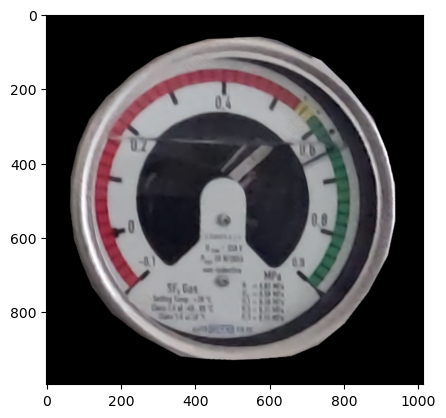

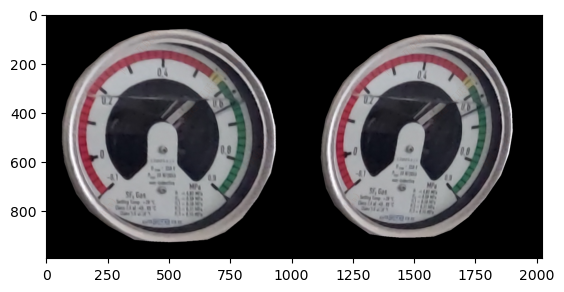

In [20]:
vis = im_shear.copy() # copy the image to draw into
trans_roll = cv2.getRotationMatrix2D((cx, cy), -27, 1) # theta is the angle of rotation in radians
print(trans_roll)
# applying rotation matrix to image
im_std = cv2.warpAffine(vis, trans_roll, (int(vis.shape[1]), int(vis.shape[0])))
plt.imshow(im_std)
plt.show()
# concat the original and the final one into a single image for better comparison
im_cmp = np.hstack((im_padded, im_std))
plt.imshow(im_cmp)
plt.show()